In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## TidyCensus Example

This notebook grabs data from the US Census using the [tidycensus package in R](https://walker-data.com/tidycensus/index.html). Make sure you have installed the `tidyverse` and `tidycensus` packages.

In [3]:
%%R 

library(tidycensus)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Step 1 \| Get a Census API key and replace it in the cell below

In [4]:
%%R 

census_api_key("YOUR-CENSUS-API-KEY-HERE")

R[write to console]: To install your API key for use in future sessions, run this function with `install = TRUE`.



### Step 2 \| Figure out what tables you want data from

Use <https://censusreporter.org/> to figure out which tables you want.

-   Scroll to the bottom of the page to see the tables.

-   If you already know the table ID, stick that in the "Explore" section to learn more about that table.

Once you've found the variable or variables you want, you can plug them into this code:

In [5]:
%%R 
# the variable B01003_001E was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/


# Get variable from ACS
population <- get_acs(geography = "county", 
                      state='NY',
                      variables = c(pop = "B01003_001E"), 
                      year = 2021,
                      survey="acs5")


R[write to console]: Getting data from the 2017-2021 5-year ACS

R[write to console]: Using FIPS code '36' for state 'NY'



List counties with the highest population in the US

In [6]:
%%R 

population %>% arrange(desc(estimate)) %>% head()

# A tibble: 6 × 5
  GEOID NAME                      variable   estimate   moe
  <chr> <chr>                     <chr>         <dbl> <dbl>
1 36047 Kings County, New York    B01003_001  2712360    NA
2 36081 Queens County, New York   B01003_001  2393104    NA
3 36061 New York County, New York B01003_001  1669127    NA
4 36103 Suffolk County, New York  B01003_001  1522998    NA
5 36005 Bronx County, New York    B01003_001  1468262    NA
6 36059 Nassau County, New York   B01003_001  1391678    NA


### Step 3 \| Example Map

See more details about making maps here:

https://walker-data.com/tidycensus/articles/spatial-data.html

R[write to console]: Getting data from the 2017-2021 5-year ACS

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '061' for 'New York County'



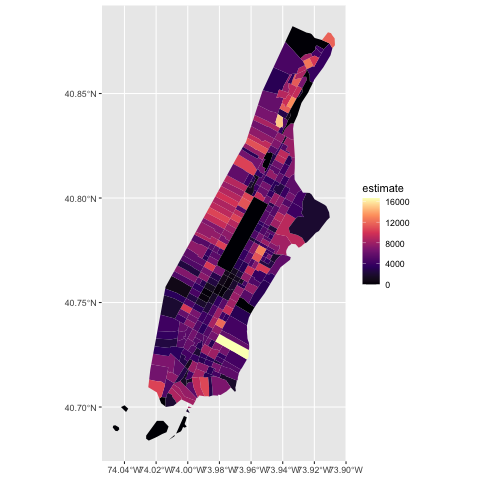

In [15]:
%%R 

options(tigris_use_cache = TRUE)

manhattan <- get_acs(
  state = "NY",
  county = "New York",
  geography = "tract",
  variables = "B01003_001E",
  geometry = TRUE,
  year = 2021
)

manhattan %>%
  ggplot(aes(fill = estimate)) + 
  geom_sf(color = NA) + 
  scale_fill_viridis_c(option = "magma") 
